# Tidying Messy Datasets

Reference: [Tidy Data](https://vita.had.co.nz/papers/tidy-data.pdf), by Hadley Wickham

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

## 1. Column headers are values, not variable names

A common type of messy dataset is tabular data designed for presentation, where **variables** form both the rows and columns, and column headers are **values**, not variable names.

(For example, suppose that a particular study is interested in characteristics such as age, gender, marital status, and annual income for a sample of 100 individuals. These characteristics would be called the **variables** of the study, and data values for each of the variables would be associated with each individual. Thus, the data **values** of 28, male, single, and `$30,000` would be recorded for a 28-year-old single male with an annual income of `$30,000`. With 100 individuals and 4 variables, the data set would have `100 × 4 = 400` items. [[Statistics, Britannica Kids](https://www.britannica.com/science/statistics)])

In [3]:
ir = pd.DataFrame(
    {
        'religion': ['Agnostic', 'Atheist', 'Buddhist',],
        '$00-10k' : [ 27,  12,  27,],
        '$10-20k' : [ 34,  27,  21,],
        '$20-30k' : [ 60,  37,  30,],
        '$30-40k' : [ 81,  52,  34,],
    })

This dataset has three variables: `religion`, `income` and `frequency`.

In [4]:
ir

,religion,$00-10k,$10-20k,$20-30k,$30-40k
0,Agnostic,27,34,60,81
1,Atheist,12,27,37,52
2,Buddhist,27,21,30,34


(Notice that the following tabular representation of the dataset does not show the names of two variables, `income` and `frequency`. That is the drawback of *messy data*.)

(For later use, the list of strings representing the income class is stored in a Python variable `income_class`.

In [5]:
income_class = ir.columns.to_list()[1:]

In [6]:
income_class

['$00-10k', '$10-20k', '$20-30k', '$30-40k']

### Tidying messy dataframes

To tidy it, we need to **melt**, or stack it. In other words, we need to turn columns into rows.

Melting is parameterized by a list of columns that are already variables, or `id_var`s for short. The above dataset has one id_var, `religion`.

The other columns are converted into two variables:
- a new variable called `variable` that contains repeated column headings and
- a new variable called `value` that contains the concatenated data values from the previously separate columns.

In [7]:
ir.melt(
    id_vars=['religion'], 
    value_vars=income_class,
        # ['$00-10k', '$10-20k', '$20-30k', '$30-40k']
).head()

,religion,variable,value
0,Agnostic,$00-10k,27
1,Atheist,$00-10k,12
2,Buddhist,$00-10k,27
3,Agnostic,$10-20k,34
4,Atheist,$10-20k,27


To better reflect their roles in this dataset, the variable column has been renamed to `income`, and the value column to `freq`.

In [8]:
tidy_ir = ir.melt(
    id_vars=['religion'], 
    value_vars=income_class,
    var_name='income',
    value_name='freq',
)

In [9]:
tidy_ir

,religion,income,freq
0,Agnostic,$00-10k,27
1,Atheist,$00-10k,12
2,Buddhist,$00-10k,27
3,Agnostic,$10-20k,34
4,Atheist,$10-20k,27
5,Buddhist,$10-20k,21
6,Agnostic,$20-30k,60
7,Atheist,$20-30k,37
8,Buddhist,$20-30k,30
9,Agnostic,$30-40k,81


This form is tidy because each column represents a variable and each row represents an observation, in this case a demographic unit corresponding to a combination of religion and income.

### Presenting tidy dataframes

In [10]:
import seaborn as sns

In [11]:
sns.set_theme(style='darkgrid')

Now that you have the tidy data, you have two options for presentation: grouped by `religion` or by `income`.

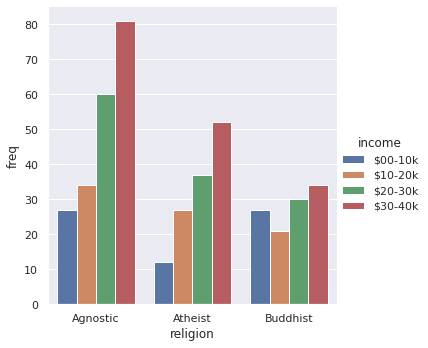

In [12]:
sns.catplot(
    data=tidy_ir, kind='bar', y='freq', x='religion', hue='income')

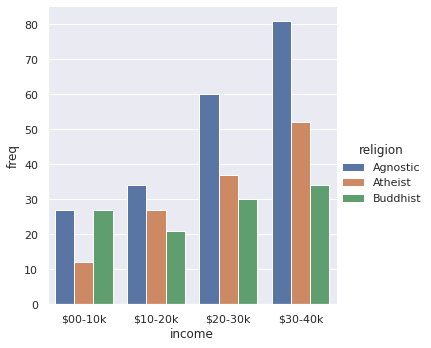

In [13]:
sns.catplot(
    data=tidy_ir, kind='bar', y='freq', x='income', hue='religion')

To reshape the dataframe for presentation, we use the `DataFrame.pivot()` method.

In [14]:
tidy_ir.pivot(index='religion', columns='income', values='freq')

income,$00-10k,$10-20k,$20-30k,$30-40k
religion,,,,
Agnostic,27,34,60,81
Atheist,12,27,37,52
Buddhist,27,21,30,34


In [15]:
tidy_ir.pivot(index='income', columns='religion', values='freq')

religion,Agnostic,Atheist,Buddhist
income,,,
$00-10k,27,12,27
$10-20k,34,27,21
$20-30k,60,37,30
$30-40k,81,52,34
